In [442]:
#import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # for plotting statistical graphs
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings # for warning control
from scipy import stats
from scipy.stats import norm, skew #for statistical calculations

In [443]:
#import data
path = 'F:/Dropbox/Columbia MSBA/IEOR E4501 Tools for Analytics/Project/airbnb-price-prediction/data.csv'
data = pd.read_csv(path)

G:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,25,26,27,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,55,56,57,60,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [444]:
# examine our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 68 columns):
id                        65282 non-null int64
log_price                 65282 non-null float64
property_type             65282 non-null object
room_type                 65282 non-null object
accommodates              65282 non-null int64
bathrooms                 65127 non-null float64
bed_type                  65282 non-null object
cancellation_policy       65282 non-null object
cleaning_fee              65282 non-null bool
city                      65282 non-null object
first_review              52558 non-null object
host_has_profile_pic      65136 non-null object
host_identity_verified    65282 non-null bool
host_response_rate        50463 non-null object
host_since                65136 non-null object
instant_bookable          65282 non-null bool
last_review               52588 non-null object
latitude                  65282 non-null float64
longitude                 65282 

In [445]:
# do data cleaning by deleting unmeaningful columns 
del_cols=['Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67']
data.drop(del_cols,axis=1,inplace=True)
data.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable', 'last_review',
       'latitude', 'longitude', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [446]:
# check the datatypes of all variables.
pd.options.display.max_rows = 65
dtypes = data.dtypes.reset_index()
dtypes.columns = ["Count", "Column Type"]
dtypes

,Count,Column Type
0,id,int64
1,log_price,float64
2,property_type,object
3,room_type,object
4,accommodates,int64
5,bathrooms,float64
6,bed_type,object
7,cancellation_policy,object
8,cleaning_fee,bool
9,city,object


In [378]:
# group by types
dtypes.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,bool,3
1,int64,2
2,float64,7
3,object,13


In [379]:
# divide the variables into numerical variables and categorical variables
num_var=['accommodates','bathrooms','cancellation_fee','first_view','host_response_rate','host_since','latitude','longitude','number_of_reviews','review_scores_rating',
        'zipcode','bedrooms','beds']
cate_var=['property_type','room_type','bed_type','cancellation_policy','city','host_has_profile_pic','host_identity_verified','instant_bookable','neighbourhood']

In [380]:
# describe log_price column
data['log_price'].describe()

count    65282.000000
mean         4.785188
std          0.714140
min          0.000000
25%          4.317488
50%          4.718499
75%          5.220356
max          7.600402
Name: log_price, dtype: float64

In [381]:
# calculate target variable
data['Saleprice']=np.exp(data['log_price'])

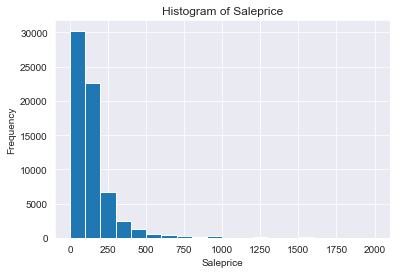

In [382]:
# draw histogram function
def drawHist(heights):
    plt.hist(heights, 20)
    plt.xlabel('Saleprice')
    plt.ylabel('Frequency')
    plt.title('Histogram of Saleprice')
    plt.show()

In [ ]:
# draw 'Saleprice' histogram
drawHist(data['Saleprice']

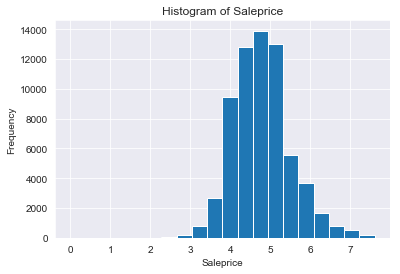

In [383]:
# draw 'log_price' histogram
drawHist(data['log_price'])
# The distribution is like a bell curve (normal distribution).

In [384]:
# drop 'Saleprice' variable to avoid complete correlation with 'log_price'
data.drop('Saleprice', axis=1, inplace=True)

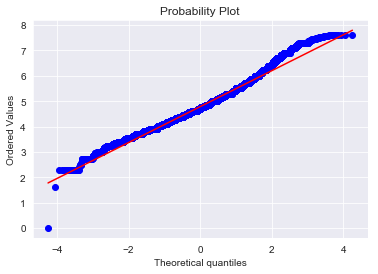

In [385]:
# plot probability distribution  
fig = plt.figure()
res = stats.probplot(data['log_price'], plot=plt)
plt.show()

In [386]:
# data cleaning with dates function
import time
import datetime
def dif_time(date):
    now_time = datetime.datetime.now()
    now_time = now_time.strftime('%Y/%m/%d')
    d2 = datetime.datetime.strptime(now_time, '%Y/%m/%d')
    if str(date) !='nan':
        d1 = datetime.datetime.strptime(str(date),'%Y/%m/%d')
        day = (d2 - d1).days
        return day
    else:
        return None

In [387]:
# convert dates to number of days 
dates_to_transform=['first_review','host_since','last_review']
for col in dates_to_transform:
    data[col]=data[col].apply(dif_time)

In [388]:
# convert to type int
for u in data.columns:
    if data[u].dtype==bool:
        data[u]=data[u].astype('int')

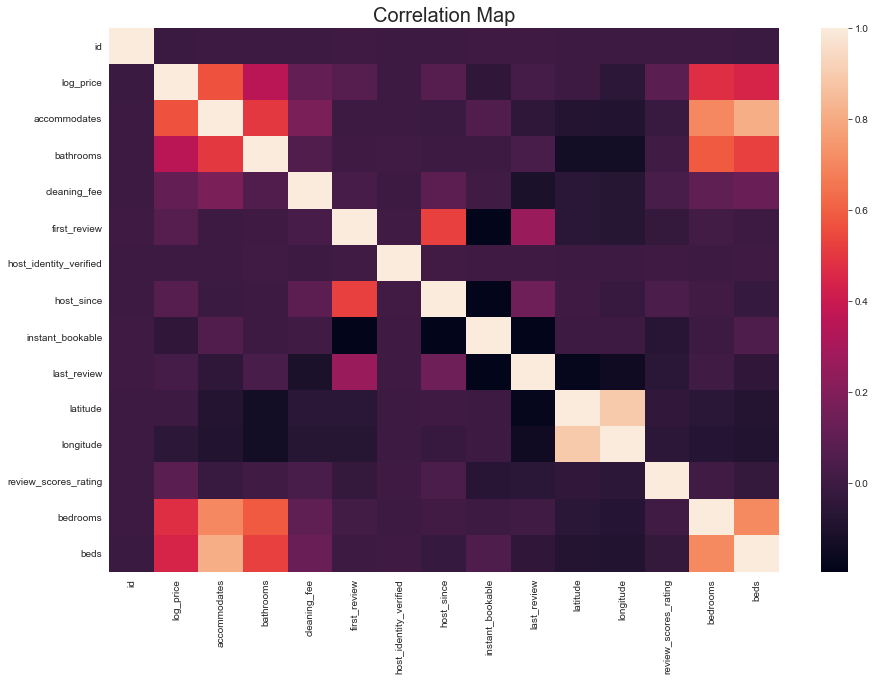

In [389]:
#plot correlation matrix
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

def correlation_map(df):
    correlation = data.corr()
    plt.subplots(figsize=(15,10))
    plt.title('Correlation Map', fontsize=20)
    sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
    
correlation_map(data)

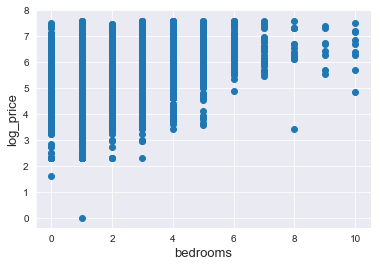

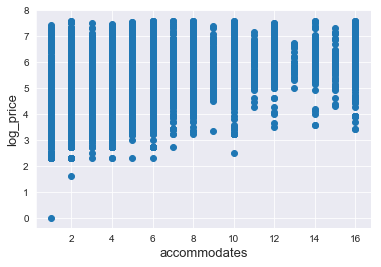

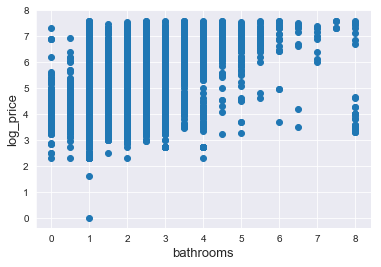

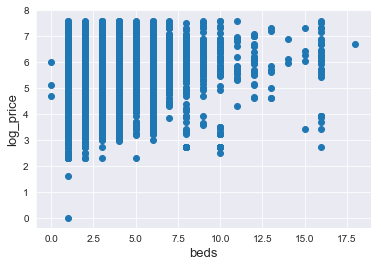

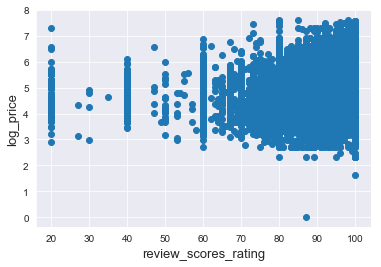

G:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x864 with 0 Axes>

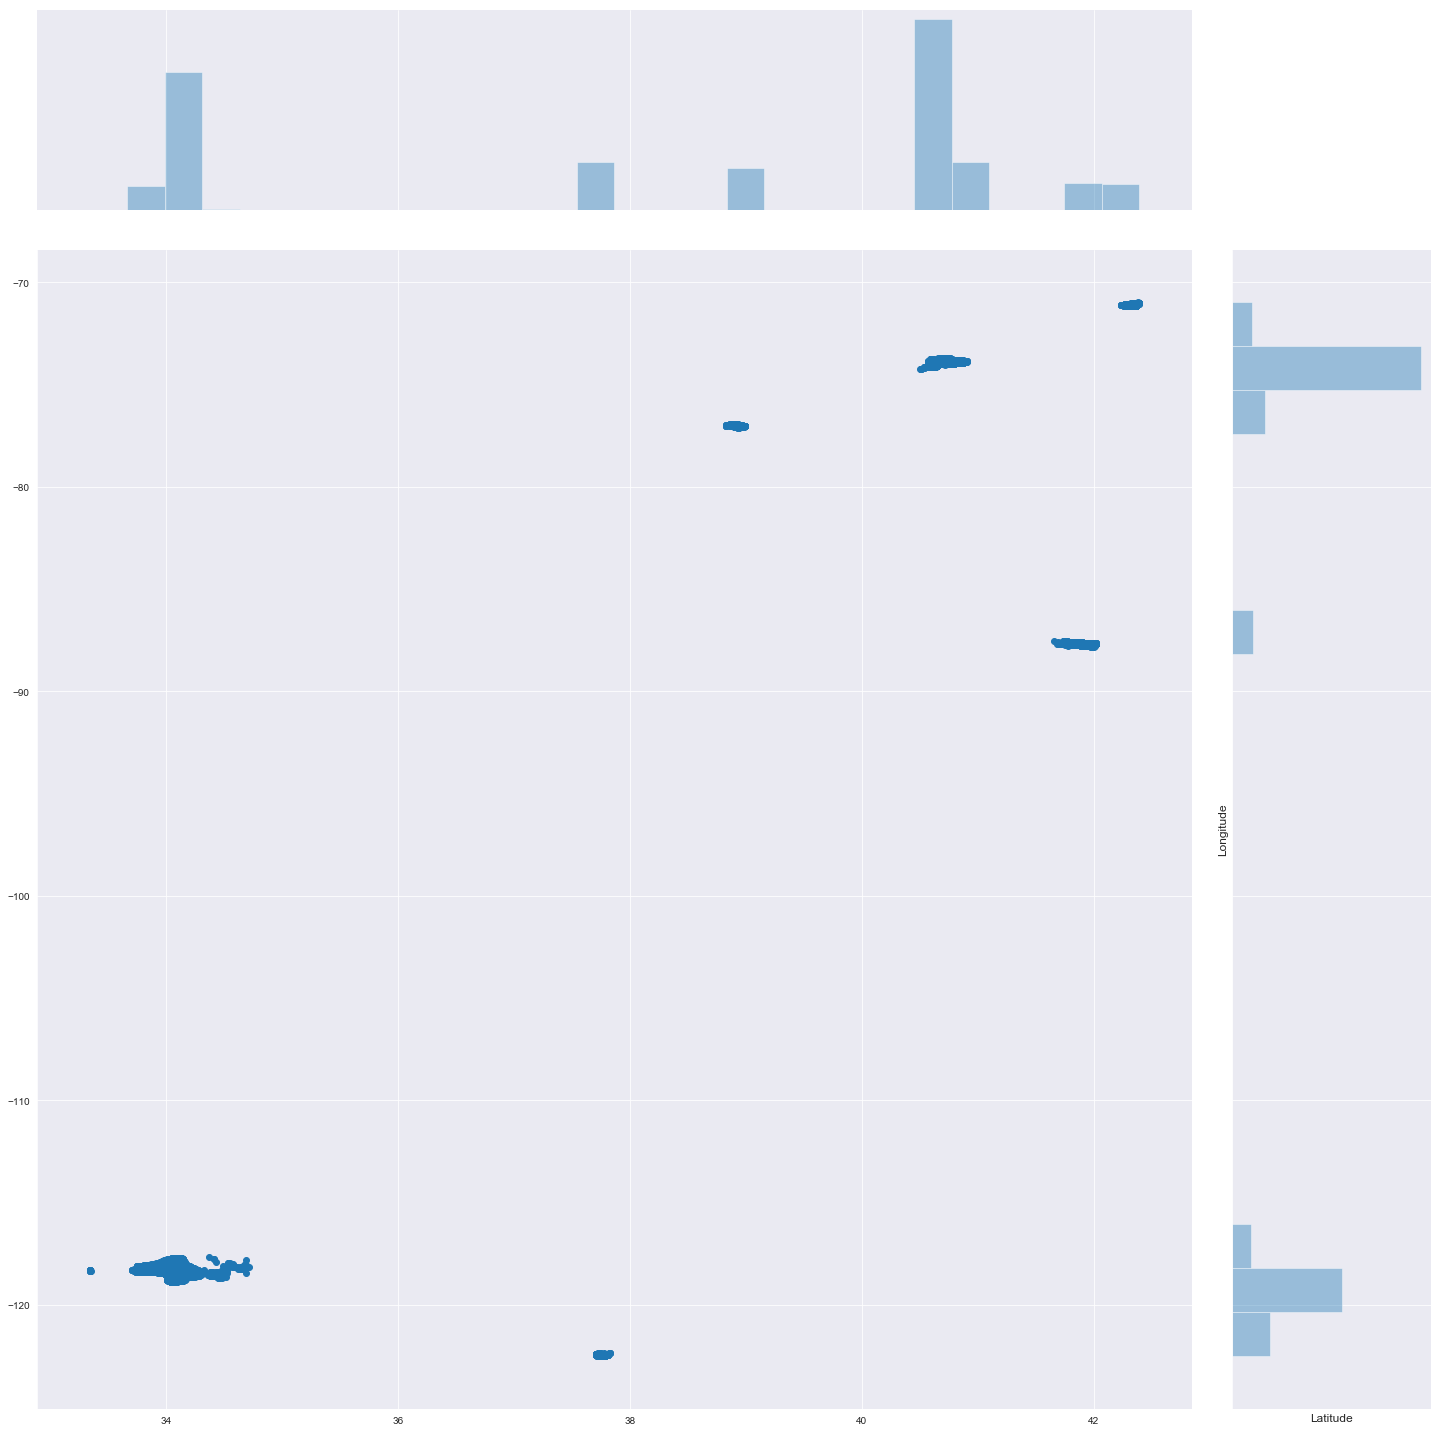

In [390]:
# scatter plot 
# log_price vs bedrooms
fig, ax = plt.subplots()
ax.scatter(data['bedrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bedrooms', fontsize=13)
plt.show()

# log_price vs accomodates
fig, ax = plt.subplots()
ax.scatter(data['accommodates'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('accommodates', fontsize=13)
plt.show()

# log_price vs bathrooms
fig, ax = plt.subplots()
ax.scatter(data['bathrooms'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('bathrooms', fontsize=13)
plt.show()

# log_price vs beds
fig, ax = plt.subplots()
ax.scatter(data['beds'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('beds', fontsize=13)
plt.show()

# log_price vs review_scores_rating
fig, ax = plt.subplots()
ax.scatter(data['review_scores_rating'], data['log_price'])
plt.ylabel('log_price', fontsize=13)
plt.xlabel('review_scores_rating', fontsize=13)
plt.show()

# explore the latitude and longitude variable distributions by joint plotting them
plt.figure(figsize=(12,12))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=20)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(-0.5, 4.5, 0, 10)

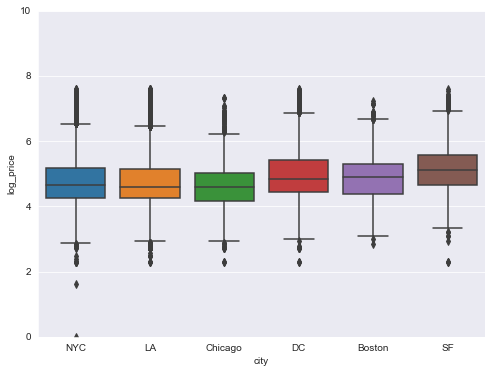

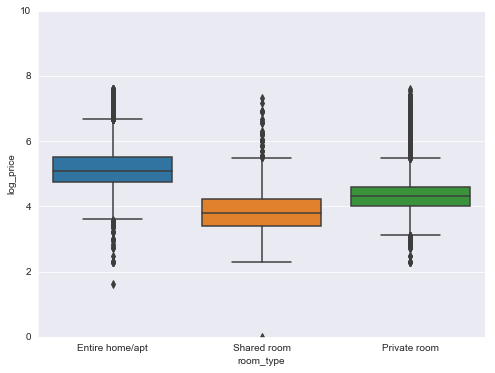

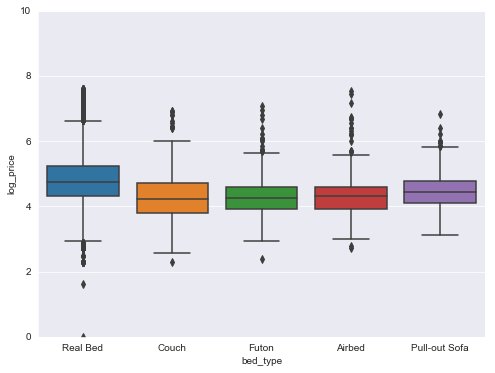

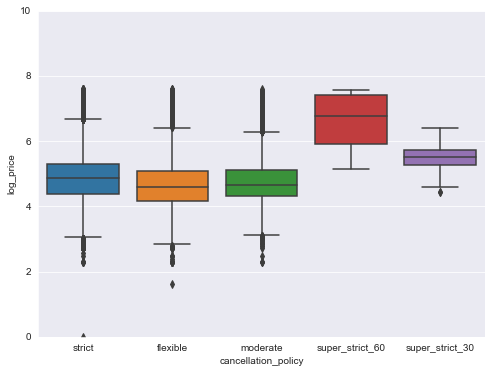

In [391]:
# box plot
# log_price vs city
var = 'city'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs room_type
var = 'room_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# # log_price vs property_type
# var = 'property_type'
# price_data = pd.concat([data['log_price'], data[var]], axis=1)
# f,ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="log_price", data=price_data)
# fig.axis(ymin=0, ymax=10)

# log_price vs bed_type
var = 'bed_type'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

# log_price vs cancellation_policy
var = 'cancellation_policy'
price_data = pd.concat([data['log_price'], data[var]], axis=1)
f,ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="log_price", data=price_data)
fig.axis(ymin=0, ymax=10)

In [392]:
#calculate missing data ratio
total_missing = data.isnull().sum()
missing_ratio = (data.isnull().sum()/data.isnull().count())
missing_data = pd.concat([total_missing, missing_ratio], axis=1, keys=['total_missing', 'missing_ratio'])
missing_data = missing_data.ix[missing_data['missing_ratio']>0]
missing_data = missing_data.sort_values(by='missing_ratio',ascending=False)
missing_data.head(20)

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,total_missing,missing_ratio
host_response_rate,14819,0.227000
review_scores_rating,13439,0.205861
first_review,12724,0.194908
last_review,12694,0.194449
neighbourhood,5178,0.079317
zipcode,759,0.011626
bathrooms,155,0.002374
host_has_profile_pic,146,0.002236
host_since,146,0.002236
beds,123,0.001884


Text(0.5,1,'Ratio of missing data by properties')

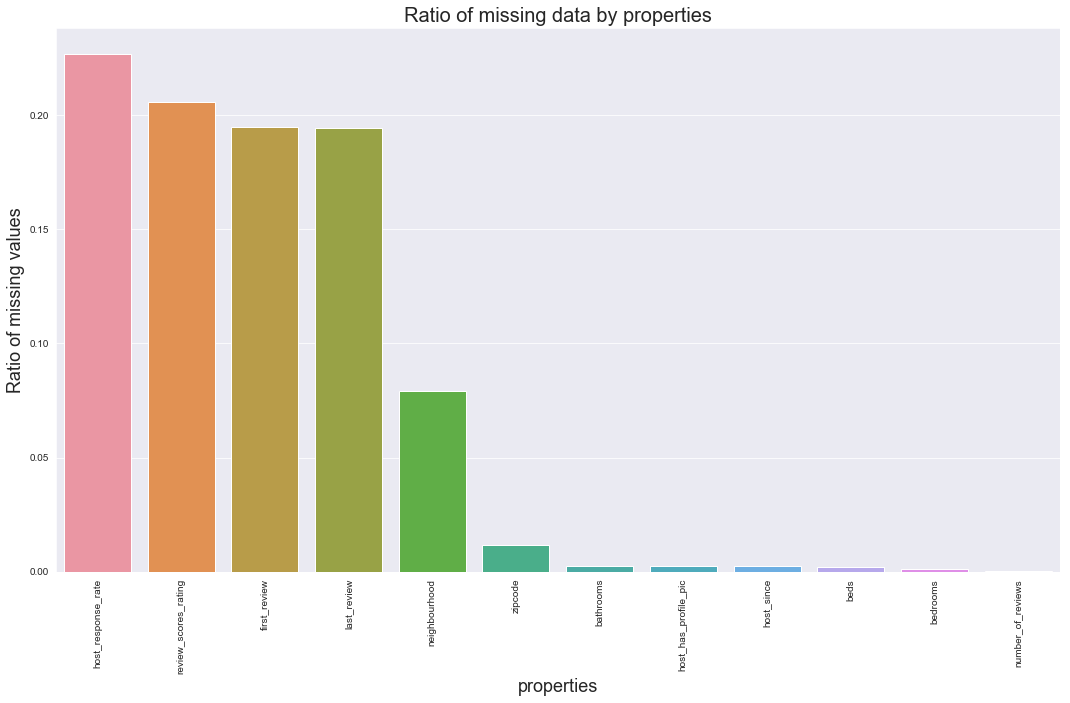

In [393]:
#plot ratio of missing
f, ax = plt.subplots(figsize=(18, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data.missing_ratio)
plt.xlabel('properties', fontsize=18)
plt.ylabel('Ratio of missing values', fontsize=18)
plt.title('Ratio of missing data by properties', fontsize=20)

In [394]:
# to many missing_values
#delete column host_response_rate
data.drop('host_response_rate', axis=1, inplace=True)

In [395]:
# fill NA by none
col_to_del=['neighbourhood','zipcode']
for col in col_to_del:
    data[col] = data[col].fillna('None')

In [396]:
# only fetch data with not "None" values
data = data[(data.neighbourhood != 'None') & (data.zipcode != 'None')]

In [397]:
# fill NA by none
fillbynone=['first_review','host_since','last_review','host_has_profile_pic','number_of_reviews']
for col in fillbynone:
    data[col] = data[col].fillna('None')

In [398]:
#fill NA by numerical value
fillbymedian=['review_scores_rating']
for col in fillbymedian:
    data[col] = data[col].fillna(data[col].transform(lambda x: x.fillna(x.median())))

In [399]:
#fill NA by mode (the value that occurs most frequently in a given set of data)
fillbymode=['bathrooms','beds','bedrooms']
for col in fillbymode:
    data[col] = data[col].fillna(data[col].mode()[0])

In [400]:
# check if there is any missing_value left
def left_missing(dataset):
    val = dataset.isnull().sum().max()
    if val>0:
        raise ValueError('There is still missing_value left!')
left_missing(data)

In [401]:
# transform some variables to string type
data['bedrooms'] = data['bedrooms'].apply(str)
data['bathrooms'] = data['bathrooms'].apply(str)
data['accommodates']=data['accommodates'].apply(str)
data['beds']=data['beds'].apply(str)

In [402]:
data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,20605308,6.684612,House,Entire home/apt,16,5.0,Real Bed,strict,1,NYC,...,1,433,40.684922,-73.954891,Bedford-Stuyvesant,70,95.0,11216,8.0,18.0
1,2186452,6.388561,House,Entire home/apt,16,7.0,Real Bed,strict,0,LA,...,1,581,33.975376,-118.295995,South LA,16,100.0,90044,10.0,16.0
2,17764355,5.700444,House,Entire home/apt,16,5.0,Real Bed,strict,1,Chicago,...,0,623,41.947212,-87.655574,Wrigleyville,13,95.0,60613,10.0,16.0
3,1446537,7.170120,House,Entire home/apt,16,7.0,Real Bed,flexible,0,LA,...,0,597,34.048690,-118.319579,Mid-Wilshire,0,89.0,90019,10.0,16.0
4,13399619,6.257668,House,Entire home/apt,16,4.0,Real Bed,flexible,0,NYC,...,1,None,40.674952,-73.819140,South Ozone Park,0,96.0,11420,10.0,16.0


In [403]:
# explore skewness of data
numeric_feats =data.dtypes[data.dtypes != "object"].index
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


Skew in numerical features: 

There are 8 skewed numerical features to Box Cox transform


In [404]:
# split data to train and test for future regression
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(data,test_size=0.2)

train_data.to_csv('train_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

In [405]:
train_data.head()


,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
58653,17254708,5.521461,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,0,NYC,...,0,None,40.742704,-74.000064,Chelsea,0,96.0,10011,1.0,1.0
4984,12207073,4.595120,Apartment,Entire home/apt,4,1.0,Real Bed,strict,1,NYC,...,0,578,40.636731,-74.034916,Bay Ridge,10,80.0,11209,1.0,4.0
15940,8530589,5.616771,House,Entire home/apt,4,2.5,Real Bed,strict,1,LA,...,0,None,34.054496,-118.536232,Pacific Palisades,0,96.0,90272,2.0,2.0
56198,8842586,5.991465,Apartment,Entire home/apt,2,1.0,Real Bed,flexible,1,SF,...,0,None,37.800981,-122.436485,Marina,0,96.0,94123,1.0,1.0
22166,19123216,4.317488,House,Private room,3,2.0,Real Bed,moderate,1,NYC,...,0,483,40.747751,-73.887773,Jackson Heights,26,87.0,11372,1.0,2.0


In [406]:
test_data.head()

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
19111,17642814,5.105945,Apartment,Entire home/apt,6,1.0,Real Bed,strict,1,DC,...,1,574,38.904947,-77.050580,West End,53,97.0,20037,1.0,2.0
43712,11190497,4.317488,Apartment,Private room,2,1.0,Real Bed,moderate,0,NYC,...,0,438,40.729873,-73.983145,East Village,21,94.0,10003,1.0,1.0
12589,16290144,4.553877,Apartment,Entire home/apt,4,1.0,Real Bed,moderate,1,Boston,...,0,428,42.364868,-71.029919,East Boston,67,98.0,2128,2.0,2.0
64147,16838501,4.317488,Apartment,Entire home/apt,2,1.0,Real Bed,strict,1,LA,...,0,617,34.069690,-118.292210,Mid-Wilshire,5,68.0,90010,0.0,1.0
27788,6401051,4.852030,Apartment,Entire home/apt,1,2.0,Real Bed,strict,0,SF,...,0,823,37.777398,-122.419349,Civic Center,6,100.0,94102,1.0,1.0


In [407]:
# examine our data
train_data.info

47717
11930


In [ ]:
# examine our data
test_data.info

In [410]:
#if one column only has one value, consider to delete the column
train_columns_to_remove = [col for col in train_data.columns if train_data[col].nunique() == 1]
test_columns_to_remove = [col for col in test_data.columns if test_data[col].nunique() == 1]

In [411]:
# no need to remove columns
print(train_columns_to_remove)
print(test_columns_to_remove)

[]
[]


In [412]:
data.drop('id', axis=1, inplace=True)
X = data.drop("log_price",axis=1).values
y = data["log_price"].values

In [433]:
print(y)

58653    240
4984      89
15940    265
56198    384
22166     65
61688     89
43276     50
38841    130
24095     30
47040    149
67       666
62895    140
12088    145
13593    142
23074    150
4297     179
59184    215
59004     40
2599      37
27835     82
21556     89
63359    127
23661    115
6921     254
57115    180
63584    170
5260     339
14999    139
47797     45
16795    155
62584    205
33591     50
        ... 
29729     54
55441     85
23610     90
52677     69
59327     30
1981     458
12887    213
51473     70
1146      20
42335    165
64798    362
50874     29
14275    314
37263     35
47658     71
13313    105
25528     39
36382     45
18340    105
48448     70
39292    110
47960     64
701      339
4131     397
2919     213
18375    365
23375    384
32057     43
14190    366
57747    125
54886     23
49817     40
Name: log_price, Length: 47717, dtype: int64


In [413]:
from sklearn.model_selection import KFold, cross_val_score #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by d


In [414]:
from sklearn.preprocessing import LabelEncoder

In [415]:
for col in data.columns:
    print(col)
    lbl = LabelEncoder()
    lbl.fit(list(train_data[col].values.astype('str')) + list(test_data[col].values.astype('str')))
    train_data[col] = lbl.transform(list(train_data[col].values.astype('str')))
    test_data[col] = lbl.transform(list(test_data[col].values.astype('str')))

id


G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


log_price
property_type
room_type
accommodates
bathrooms
bed_type
cancellation_policy
cleaning_fee
city
first_review
host_has_profile_pic
host_identity_verified
host_since
instant_bookable
last_review
latitude
longitude
neighbourhood
number_of_reviews
review_scores_rating
zipcode
bedrooms
beds


In [416]:
from sklearn.model_selection import TimeSeriesSplit

In [417]:
import lightgbm as lgb

In [418]:
params = {"objective" : "regression", "metric" : "rmse", "max_depth": 8, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 257, "learning_rate" : 0.01, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 5}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=False, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)

In [419]:
#train = train.sort_values('date')
X = train_data.drop('log_price', axis=1)
y = train_data['log_price']
X_test = test_data.drop('log_price', axis=1)
# I use TimeSeriesSplit as we have time series
tscv = TimeSeriesSplit(n_splits=10)

In [420]:
#LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient.

for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    #print(f'Train samples: {len(train_index)}. Valid samples: {len(test_index)}')
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    

    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=10)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
prediction /= n_fold

Fold: 0
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 61.7812	valid_1's rmse: 72.862
Early stopping, best iteration is:
[818]	training's rmse: 58.9763	valid_1's rmse: 72.1977
Fold: 1
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 62.1135	valid_1's rmse: 67.7381
Early stopping, best iteration is:
[942]	training's rmse: 58.5221	valid_1's rmse: 66.8357
Fold: 2
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 62.3108	valid_1's rmse: 68.9549
[1000]	training's rmse: 58.3397	valid_1's rmse: 67.7292
Early stopping, best iteration is:
[1257]	training's rmse: 56.7227	valid_1's rmse: 67.4626
Fold: 3
Training until validation scores don't improve for 10 rounds.
[500]	training's rmse: 61.8834	valid_1's rmse: 71.815
[1000]	training's rmse: 58.0258	valid_1's rmse: 70.8469
Early stopping, best iteration is:
[1393]	training's rmse: 55.6298	valid_1's rmse: 70.4797
Fold: 4
Training until valid

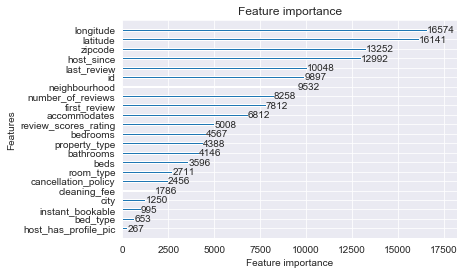

In [421]:
# Use lgb model to list the feature importance from the most important feature to the least important feature.

lgb.plot_importance(model, max_num_features=30);

In [422]:
# import catboost library
from catboost import CatBoostRegressor

In [423]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=3)

In [424]:
model = CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             #metric_period = 50,
                             od_wait=20)
model.fit(X_train, y_train,
              eval_set=(X_test, y_test),
              use_best_model=True,
              verbose=True)
    
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)



0:	learn: 172.1187904	test: 171.7353062	best: 171.7353062 (0)	total: 613ms	remaining: 10m 12s
1:	learn: 159.3977314	test: 159.2365076	best: 159.2365076 (1)	total: 1s	remaining: 8m 21s
2:	learn: 148.4568548	test: 148.5420522	best: 148.5420522 (2)	total: 1.68s	remaining: 9m 17s
3:	learn: 138.6178843	test: 138.9253363	best: 138.9253363 (3)	total: 2.32s	remaining: 9m 36s
4:	learn: 129.8286444	test: 130.3986594	best: 130.3986594 (4)	total: 2.9s	remaining: 9m 36s
5:	learn: 122.2933422	test: 123.1938671	best: 123.1938671 (5)	total: 3.48s	remaining: 9m 36s
6:	learn: 115.6823066	test: 116.8775874	best: 116.8775874 (6)	total: 3.8s	remaining: 8m 58s
7:	learn: 109.9868968	test: 111.3988620	best: 111.3988620 (7)	total: 4.39s	remaining: 9m 4s
8:	learn: 104.9994325	test: 106.6871106	best: 106.6871106 (8)	total: 4.98s	remaining: 9m 8s
9:	learn: 100.8457626	test: 102.7218699	best: 102.7218699 (9)	total: 5.56s	remaining: 9m 10s
10:	learn: 97.2538068	test: 99.3930601	best: 99.3930601 (10)	total: 6.21s	re

89:	learn: 70.0813579	test: 74.9143926	best: 74.9143926 (89)	total: 54.5s	remaining: 9m 10s
90:	learn: 70.0621626	test: 74.9091568	best: 74.9091568 (90)	total: 55.1s	remaining: 9m 10s
91:	learn: 70.0618773	test: 74.9092817	best: 74.9091568 (90)	total: 55.1s	remaining: 9m 3s
92:	learn: 70.0618183	test: 74.9093258	best: 74.9091568 (90)	total: 55.1s	remaining: 8m 57s
93:	learn: 69.9833781	test: 74.8322887	best: 74.8322887 (93)	total: 55.8s	remaining: 8m 57s
94:	learn: 69.9833195	test: 74.8323312	best: 74.8322887 (93)	total: 55.8s	remaining: 8m 51s
95:	learn: 69.9293748	test: 74.7797318	best: 74.7797318 (95)	total: 56.5s	remaining: 8m 51s
96:	learn: 69.9285045	test: 74.7797666	best: 74.7797318 (95)	total: 56.5s	remaining: 8m 46s
97:	learn: 69.9282433	test: 74.7798874	best: 74.7797318 (95)	total: 56.6s	remaining: 8m 40s
98:	learn: 69.8621345	test: 74.7395967	best: 74.7395967 (98)	total: 57.2s	remaining: 8m 40s
99:	learn: 69.8492217	test: 74.7296126	best: 74.7296126 (99)	total: 57.2s	remaini

177:	learn: 67.0673171	test: 72.9092938	best: 72.9092938 (177)	total: 1m 32s	remaining: 7m 5s
178:	learn: 67.0435492	test: 72.8922927	best: 72.8922927 (178)	total: 1m 32s	remaining: 7m 5s
179:	learn: 67.0435361	test: 72.8924016	best: 72.8922927 (178)	total: 1m 32s	remaining: 7m 2s
180:	learn: 67.0171412	test: 72.8853660	best: 72.8853660 (180)	total: 1m 33s	remaining: 7m 2s
181:	learn: 66.9697218	test: 72.8507528	best: 72.8507528 (181)	total: 1m 34s	remaining: 7m 2s
182:	learn: 66.8944865	test: 72.7965247	best: 72.7965247 (182)	total: 1m 34s	remaining: 7m 3s
183:	learn: 66.8944745	test: 72.7966257	best: 72.7965247 (182)	total: 1m 34s	remaining: 7m
184:	learn: 66.8394666	test: 72.7593099	best: 72.7593099 (184)	total: 1m 35s	remaining: 7m
185:	learn: 66.8394553	test: 72.7594110	best: 72.7593099 (184)	total: 1m 35s	remaining: 6m 58s
186:	learn: 66.7777592	test: 72.7289434	best: 72.7289434 (186)	total: 1m 36s	remaining: 6m 58s
187:	learn: 66.7253881	test: 72.7212744	best: 72.7212744 (187)	t

265:	learn: 65.1792809	test: 71.9821704	best: 71.9821704 (265)	total: 2m 6s	remaining: 5m 50s
266:	learn: 65.1792339	test: 71.9823176	best: 71.9821704 (265)	total: 2m 6s	remaining: 5m 48s
267:	learn: 65.1605008	test: 71.9704173	best: 71.9704173 (267)	total: 2m 7s	remaining: 5m 48s
268:	learn: 65.1314154	test: 71.9528504	best: 71.9528504 (268)	total: 2m 8s	remaining: 5m 48s
269:	learn: 65.1313623	test: 71.9529086	best: 71.9528504 (268)	total: 2m 8s	remaining: 5m 46s
270:	learn: 65.1312376	test: 71.9533079	best: 71.9528504 (268)	total: 2m 8s	remaining: 5m 45s
271:	learn: 65.1094791	test: 71.9518038	best: 71.9518038 (271)	total: 2m 8s	remaining: 5m 44s
272:	learn: 65.1093777	test: 71.9522182	best: 71.9518038 (271)	total: 2m 8s	remaining: 5m 43s
273:	learn: 65.1032707	test: 71.9496703	best: 71.9496703 (273)	total: 2m 9s	remaining: 5m 43s
274:	learn: 65.0842210	test: 71.9353854	best: 71.9353854 (274)	total: 2m 10s	remaining: 5m 43s
275:	learn: 65.0758424	test: 71.9358885	best: 71.9353854 (2

353:	learn: 64.5025639	test: 71.7371323	best: 71.7252824 (346)	total: 2m 28s	remaining: 4m 31s
354:	learn: 64.4853902	test: 71.7364410	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 31s
355:	learn: 64.4602617	test: 71.7261557	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 30s
356:	learn: 64.4601708	test: 71.7264712	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 29s
357:	learn: 64.4601545	test: 71.7266087	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 28s
358:	learn: 64.4600762	test: 71.7269118	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 27s
359:	learn: 64.4600079	test: 71.7272009	best: 71.7252824 (346)	total: 2m 29s	remaining: 4m 26s
360:	learn: 64.4322737	test: 71.7171389	best: 71.7171389 (360)	total: 2m 30s	remaining: 4m 26s
361:	learn: 64.4322078	test: 71.7174079	best: 71.7171389 (360)	total: 2m 30s	remaining: 4m 25s
362:	learn: 64.4321483	test: 71.7176716	best: 71.7171389 (360)	total: 2m 30s	remaining: 4m 24s
363:	learn: 64.4231811	test: 71.7132239	best: 71.7

443:	learn: 63.8882207	test: 71.5911222	best: 71.5911222 (443)	total: 2m 47s	remaining: 3m 29s
444:	learn: 63.8875165	test: 71.5915378	best: 71.5911222 (443)	total: 2m 47s	remaining: 3m 28s
445:	learn: 63.8874523	test: 71.5916673	best: 71.5911222 (443)	total: 2m 47s	remaining: 3m 28s
446:	learn: 63.8753375	test: 71.5906489	best: 71.5906489 (446)	total: 2m 48s	remaining: 3m 27s
447:	learn: 63.8541464	test: 71.5734628	best: 71.5734628 (447)	total: 2m 48s	remaining: 3m 27s
448:	learn: 63.8428937	test: 71.5704817	best: 71.5704817 (448)	total: 2m 49s	remaining: 3m 27s
449:	learn: 63.7779847	test: 71.5535393	best: 71.5535393 (449)	total: 2m 49s	remaining: 3m 27s
450:	learn: 63.7772999	test: 71.5543499	best: 71.5535393 (449)	total: 2m 50s	remaining: 3m 27s
451:	learn: 63.7477370	test: 71.5577273	best: 71.5535393 (449)	total: 2m 50s	remaining: 3m 26s
452:	learn: 63.7477310	test: 71.5578303	best: 71.5535393 (449)	total: 2m 50s	remaining: 3m 26s
453:	learn: 63.7477261	test: 71.5579256	best: 71.5

534:	learn: 63.1851778	test: 71.3735449	best: 71.3735449 (534)	total: 3m 21s	remaining: 2m 54s
535:	learn: 63.1851777	test: 71.3735724	best: 71.3735449 (534)	total: 3m 21s	remaining: 2m 54s
536:	learn: 63.1851775	test: 71.3735980	best: 71.3735449 (534)	total: 3m 21s	remaining: 2m 53s
537:	learn: 63.1851775	test: 71.3736216	best: 71.3735449 (534)	total: 3m 21s	remaining: 2m 52s
538:	learn: 63.1848797	test: 71.3730131	best: 71.3730131 (538)	total: 3m 21s	remaining: 2m 52s
539:	learn: 63.1777131	test: 71.3724749	best: 71.3724749 (539)	total: 3m 22s	remaining: 2m 52s
540:	learn: 63.1669539	test: 71.3697283	best: 71.3697283 (540)	total: 3m 22s	remaining: 2m 52s
541:	learn: 63.1435980	test: 71.3704157	best: 71.3697283 (540)	total: 3m 23s	remaining: 2m 51s
542:	learn: 63.1435980	test: 71.3704232	best: 71.3697283 (540)	total: 3m 23s	remaining: 2m 51s
543:	learn: 63.1022365	test: 71.3524709	best: 71.3524709 (543)	total: 3m 24s	remaining: 2m 51s
544:	learn: 63.1022137	test: 71.3526853	best: 71.3